# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv('C:/Users/USER/Project Data Science/Case Study 02/train_house.csv')
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Drop variabel NaN
house = house.dropna(axis=1)

In [4]:
# Memisahkan data menjadi numerikal & kategorikal
numerical_data = house.select_dtypes(include=[np.number])
categorical_data = house.select_dtypes(exclude=[np.number])

# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

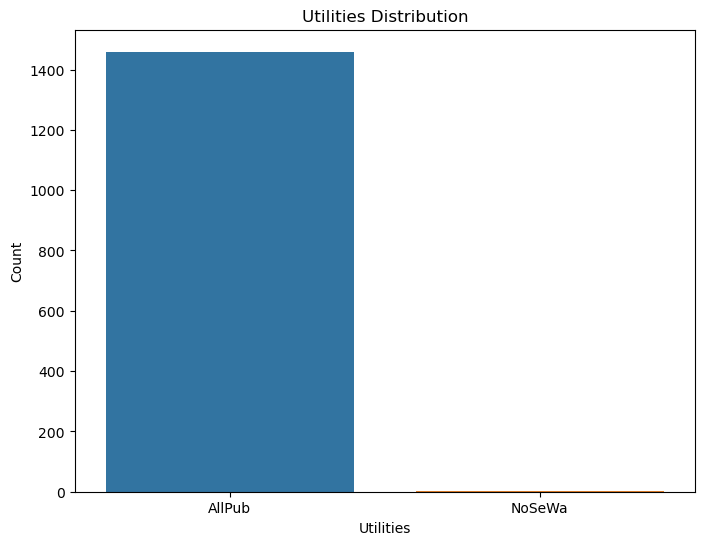

In [5]:
### Tulis kode Anda di sini
plt.figure(figsize=(8, 6))
sns.countplot(x='Utilities', data=categorical_data)
plt.title('Utilities Distribution')
plt.xlabel('Utilities')
plt.ylabel('Count')
plt.show()

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

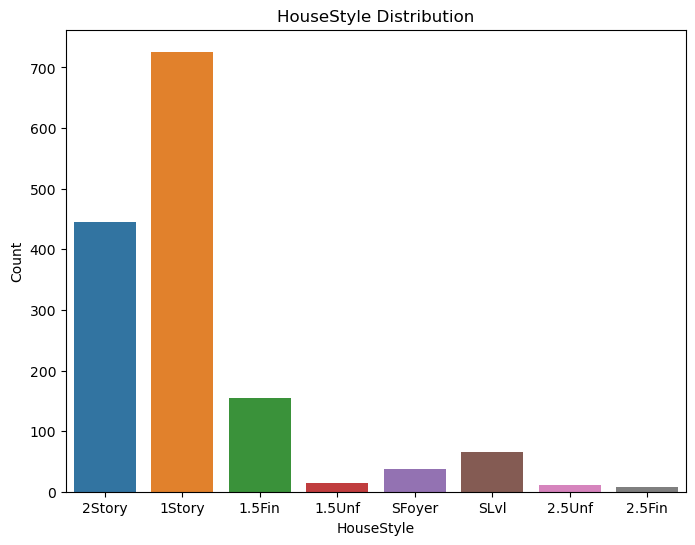

In [6]:
### Tulis kode Anda di sini
plt.figure(figsize=(8, 6))
sns.countplot(x='HouseStyle', data=categorical_data)
plt.title('HouseStyle Distribution')
plt.xlabel('HouseStyle')
plt.ylabel('Count')
plt.show()

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

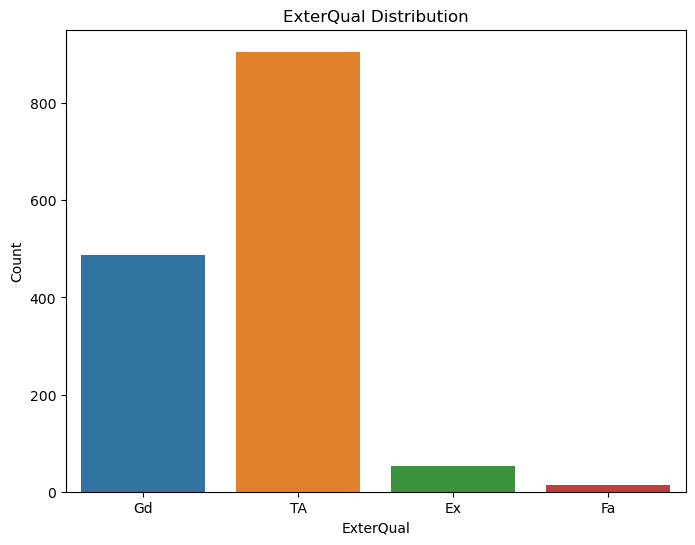

In [7]:
### Tulis kode Anda di sini
plt.figure(figsize=(8, 6))
sns.countplot(x='ExterQual', data=categorical_data)
plt.title('ExterQual Distribution')
plt.xlabel('ExterQual')
plt.ylabel('Count')
plt.show()

#### **Analisis tentang variabel kategorikal**

* [*tulis analisis dan pertanyaan Anda di sini*]
* dari grafik diatas, dapat diketahui bahwa semua rumah memiliki semua fasilitas publik, dengan rata-rata memiliki house style
  1story, dan rata-rata memiliki kualitas eksterior average/typical(TA).
* berapa banyak rumah yang mempunyai semua fasilitas publik dan house style 1story dengan kualitas eksterior average/typical ?

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

180921.19589041095
163000.0
79415.29188606751


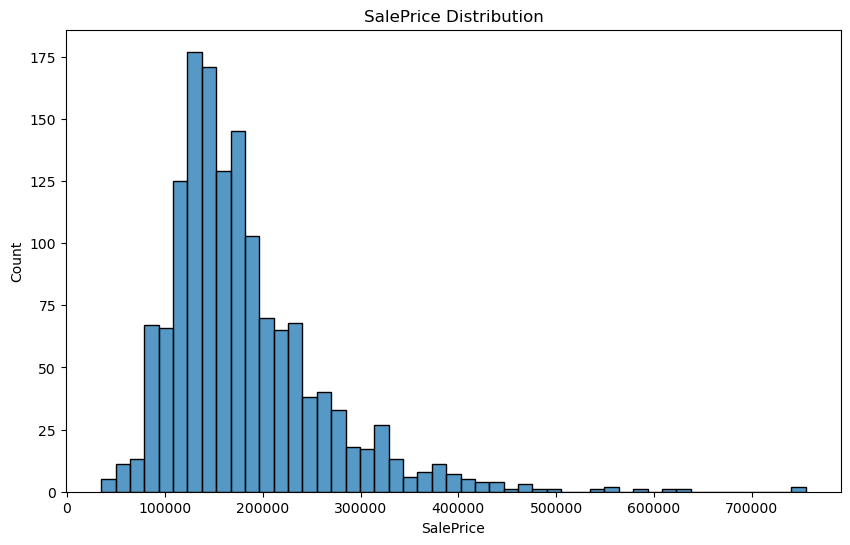

In [8]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
print(stats.mean(numerical_data['SalePrice']))
print(stats.median(numerical_data['SalePrice']))
print(np.std(numerical_data['SalePrice']))
plt.figure(figsize=(10, 6))
sns.histplot(x='SalePrice', data=numerical_data)
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.show()

#### **Analisis tentang variabel `SalePrice`**

* [*tulis analisis dan pertanyaan Anda di sini*]
* berapa rata-rata harga suatu rumah yang paling banyak ?
* dari grafik di atas menunjukkan bahwa rata-rata harga rumah antara 100000 hingga 200000

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

1515.463698630137
1464.0
525.3003935623229


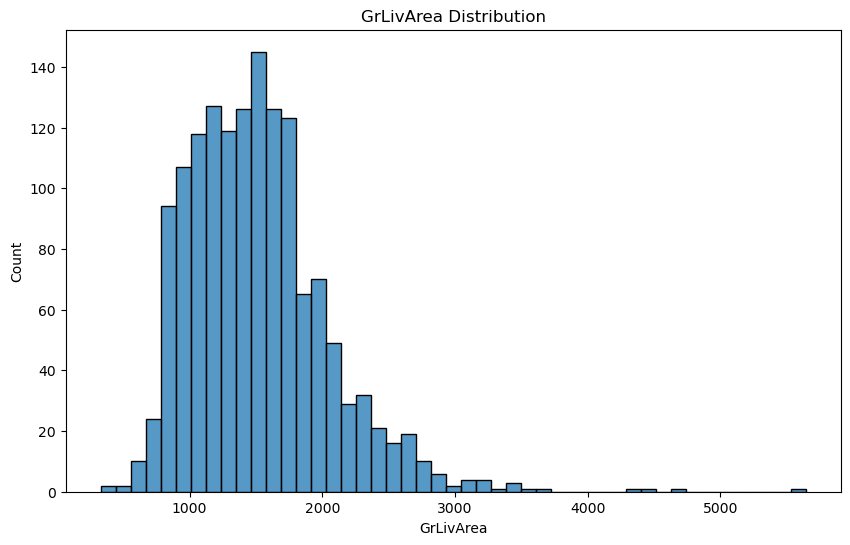

In [9]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
print(stats.mean(numerical_data['GrLivArea']))
print(stats.median(numerical_data['GrLivArea']))
print(np.std(numerical_data['GrLivArea']))
plt.figure(figsize=(10, 6))
sns.histplot(x='GrLivArea', data=numerical_data)
plt.title('GrLivArea Distribution')
plt.xlabel('GrLivArea')
plt.ylabel('Count')
plt.show()

#### **Analisis tentang variabel `GrlivArea`**

* [*tulis analisis dan pertanyaan Anda di sini*]
* berapa rata-rata luas GrLivArea pada suatu rumah yang paling banyak ?
* dari grafik di atas menunjukkan bahwa rata-rata rumah memiliki luas GrLivArea sekitar 800 hingga 2000 square feet

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

472.9801369863014
480.0
213.7316080751566


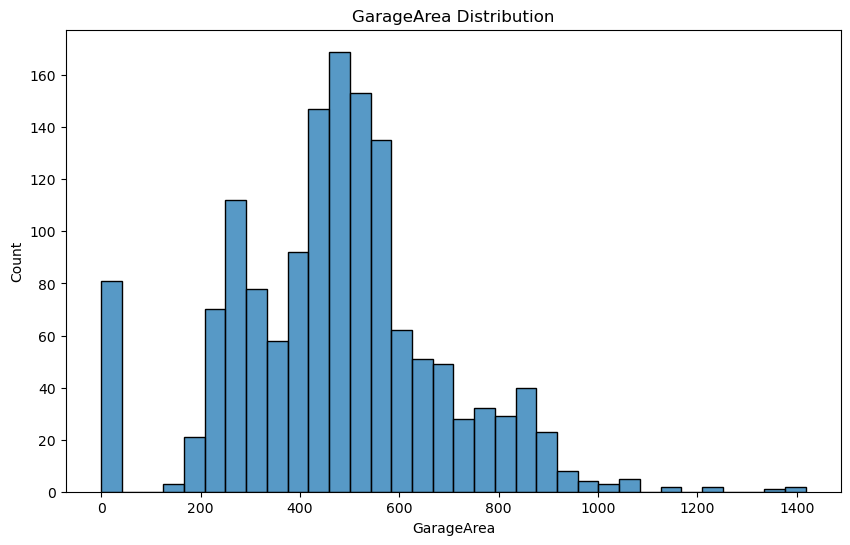

In [10]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
print(stats.mean(numerical_data['GarageArea']))
print(stats.median(numerical_data['GarageArea']))
print(np.std(numerical_data['GarageArea']))
plt.figure(figsize=(10, 6))
sns.histplot(x='GarageArea', data=numerical_data)
plt.title('GarageArea Distribution')
plt.xlabel('GarageArea')
plt.ylabel('Count')
plt.show()

#### **Analisis tentang variabel `GarageArea`**

* [*tulis analisis dan pertanyaan Anda di sini*]
* berapa rata-rata luas GarageArea pada suatu rumah yang paling banyak ?
* dari grafik di atas menunjukkan bahwa rata-rata rumah memiliki luas GarageArea sekitar 300 hingga 500 square feet

## Pemrosesan Data Variabel Numerikal

In [11]:
# Transformasi log-10 SalePrice

### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
log_price = np.log10(numerical_data['SalePrice'])
log_price.describe()

count    1460.000000
mean        5.221979
std         0.173480
min         4.542825
25%         5.113860
50%         5.212188
75%         5.330414
max         5.877947
Name: SalePrice, dtype: float64

In [12]:
# Transformasi log-10 GrLivArea

### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
log_GrLivArea = np.log10(numerical_data['GrLivArea'])
log_GrLivArea.describe()

count    1460.000000
mean        3.156354
std         0.144859
min         2.523746
25%         3.052886
50%         3.165541
75%         3.249626
max         3.751433
Name: GrLivArea, dtype: float64

In [13]:
# Menghilangkan nilai nol pada GarageArea

### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
Garage_Area = house[house['GarageArea'] > 0]
log_Garage = np.log10(Garage_Area['GarageArea'])
log_Garage.describe()

count    1379.000000
mean        2.669615
std         0.164278
min         2.204120
25%         2.579784
50%         2.684845
75%         2.763425
max         3.151676
Name: GarageArea, dtype: float64

#### **Penjelasan dan analisis tentang pemrosesan data**

* [*tulis penjelasan dan analisis Anda di sini*]
* Nilai 0 dihilangkan karena kurang masuk akal jika luas GarageArea bernilai 0 tetapi memiliki nilai SalePrice, luas GarageArea harus bernilai diatas 0 untuk memiliki nilai SalePrice

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

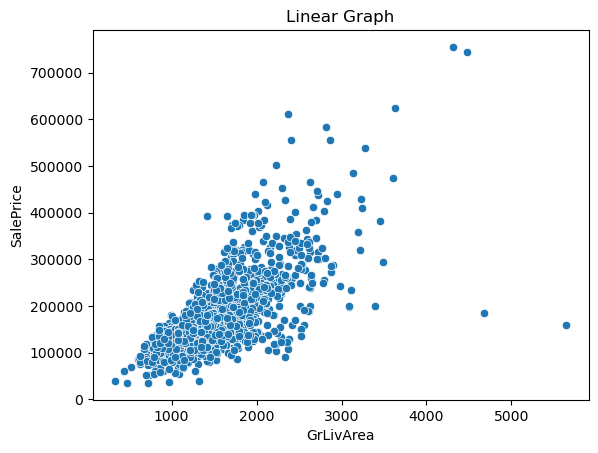

In [14]:
ax = sns.scatterplot(x='GrLivArea', y='SalePrice', data=numerical_data)
plt.title('Linear Graph')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# `GarageArea` dengan `SalePrice`

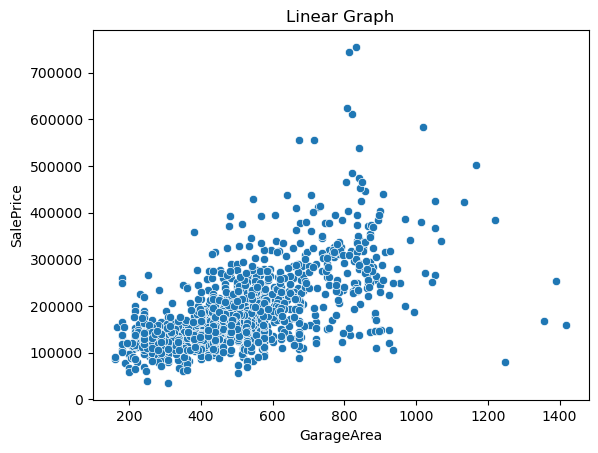

In [15]:
ax = sns.scatterplot(x=Garage_Area['GarageArea'], y='SalePrice', data=numerical_data)
plt.title('Linear Graph')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

* [*tulis hipotesis Anda di sini*]
* GrLivArea berbanding lurus dengan SalePrice, dimana ketika luas GrLiveArea meningkat, maka harga rumah juga ikut naik
* GarageArea berbanding lurus dengan SalePrice, dimana ketika luas GrLiveArea meningkat, maka harga rumah juga ikut naik